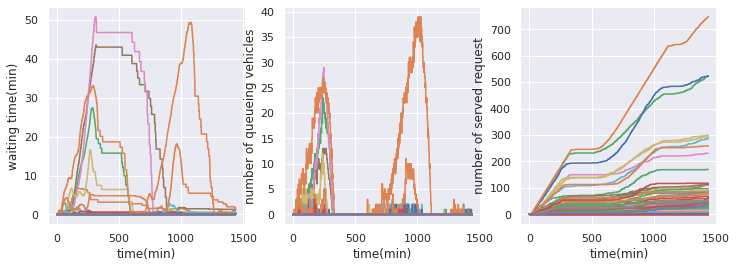

In [22]:
%run init_results.py

In [2]:
# %run preprocessing/snap_to_road.py


/home/sguo/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/IPython/core/ultratb.py:1366: RuntimeWarning: coroutine 'AsyncRequester.async_requests' was never awaited
  self.tb = tb


RuntimeError: This event loop is already running

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()


In [5]:
df = gpd.read_file('data/NYC_shapefiles/tagged_clustered_hex.shp')

print(df.head)

<bound method NDFrame.head of       Id GRID_ID      lat      lon  id_1  cluster_la  tagged_lat  tagged_lon  \
0      0   AU-55  40.5623 -73.9113     3           0   40.562281  -73.911379   
1      0   AZ-55  40.5656 -73.8738     1           2   40.565813  -73.873166   
2      0   AJ-54  40.5722 -73.9937    68           0   40.572204  -73.993668   
3      0   AL-54  40.5722 -73.9787   135           0   40.573567  -73.978102   
4      0   AH-53  40.5788 -74.0087     7           0   40.578863  -74.008854   
...   ..     ...      ...      ...   ...         ...         ...         ...   
1342   0    AY-3  40.9052 -73.8807     2           1   40.906585  -73.879998   
1343   0    BC-3  40.9052 -73.8506    14           1   40.905131  -73.850414   
1344   0    AU-2  40.9118 -73.9108     2           1   40.911770  -73.910511   
1345   0    AV-2  40.9151 -73.9033     6           1   40.915153  -73.903571   
1346   0    AW-2  40.9118 -73.8958    23           1   40.911804  -73.895706   

         

In [ ]:
df = pd.read_csv('data/trip_records/hex_trips_2016-05.csv')
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.origin_lon,df.origin_lat))

polygons = gpd.GeoDataFrame.from_file('data/NYC_shapefiles/selected_hexagon.shp')

polygons = polygons.to_crs({'init':'epsg:4326'})
taxi_zones = gpd.GeoDataFrame.from_file('data/NYC_shapefiles/taxi_zones.shp')

pts = gdf.copy()
pts.crs = polygons.crs

pts_within = gpd.sjoin(pts,polygons,how="left", op="within")

hex_count = pts_within.groupby('GRID_ID')['id'].count() #.to_csv('data/hex_count.csv')
hex_count.columns = ["GRID_ID","NUM_ORDER"]
polygons = polygons.merge(hex_count,on = "GRID_ID")
polygons.rename(columns={('Id', 'GRID_ID', 'lat', 'lon', 'geometry', 'id'):('Id', 'GRID_ID', 'lat', 'lon', 'geometry', 'num_orders')},inplace = True)

Index(['Id', 'GRID_ID', 'lat', 'lon', 'id_1', 'cluster_la', 'geometry'], dtype='object')


cluster_la
0      516197
1       78088
2      263849
3      336151
4      534655
5     3307771
6       99632
7      604634
8     2032311
9     2017451
10      38040
11    3107674
Name: id_1, dtype: int64

In [3]:
kmeans = KMeans(n_clusters = 12, max_iter=1000, init ='k-means++')
X_weighted = pd.DataFrame(polygons)
lat_long = X_weighted[['lon','lat']]
lot_size = X_weighted.id_1
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) 
X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

centers = kmeans.cluster_centers_ 
labels = X_weighted['cluster_label'] # labels 

X_weighted.plot.scatter(x = 'lon', y = 'lat', c=labels, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Weighted',fontsize=18, fontweight='bold')

plt.show()




AttributeError: 'DataFrame' object has no attribute 'id'

In [22]:

polygons = gpd.GeoDataFrame.from_file('data/NYC_shapefiles/clustered_hex.shp')

print(polygons.groupby(['cluster_la']))

In [ ]:
from sklearn.metrics import silhouette_score

K=range(2,10)
score=[]
for k in K:
    kmeans = KMeans(n_clusters = 12, max_iter=1000, init ='k-means++')
    X_weighted = pd.DataFrame(polygons)
    lat_long = X_weighted[['lon','lat']]
    lot_size = X_weighted.id
    weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
    X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

    kmeans=KMeans(n_clusters=k)
    kmeans.fit(s)
    score.append(silhouette_score(l,metric='euclidean'))
plt.plot(K,score,'r*-')
plt.xlabel('k')
plt.ylabel(u'metris')
plt.title(u'optimal K')
plt.show()

In [ ]:

polygons.to_file('data/NYC_shapefiles/clustered_hex.shp')

In [8]:
mylist = [15,22,33,4,5,5]
print(mylist.index)

<built-in method index of list object at 0x7fe84f8b6690>


In [5]:

from collections import defaultdict
from config.hex_setting import charging_station_data_path

mylist = []
with open(charging_station_data_path,'r') as f:
    next(f)
    for lines in f:
        line = lines.strip().split(',')
        mylist.append([line[2:6]])
print(mylist)

73.91811']], [['1', '0.00', '40.7174257', '-73.9202355']], [['3', '0.00', '40.817326', '-73.920914']], [['4', '0.00', '40.755508', '-73.922168']], [['3', '0.00', '40.867375', '-73.924227']], [['4', '0.00', '40.762763', '-73.924473']], [['0.00', '1', '40.792194', '-73.92455']], [['0.00', '1', '40.79237', '-73.924644']], [['0.00', '1', '40.7923', '-73.92468']], [['4', '0.00', '40.762417', '-73.926985']], [['3', '0.00', '40.7765717', '-73.9283585']], [['1', '0.00', '40.8506642', '-73.9306379']], [['2', '0.00', '40.822142', '-73.931128']], [['6', '0.00', '40.718053', '-73.931508']], [['4', '0.00', '40.848198', '-73.931808']], [['4', '0.00', '40.852225', '-73.934213']], [['2', '0.00', '40.601595', '-73.934605']], [['4', '0.00', '40.742875', '-73.935806']], [['4', '0.00', '40.800795', '-73.937382']], [['4', '0.00', '40.847482', '-73.937862']], [['1', '0.00', '40.854693', '-73.939432']], [['6', '0.00', '40.749893', '-73.939758']], [['2', '0.00', '40.656148', '-73.940355']], [['2', '0.00', '40